# ECE143 individual project
This assignment is to use python to mimic ad-hoc system. 
The whole project was finished with 4 functions:
Tower genration function newTwer, overlap accumulation function accumulate, signal area trim function, and plot figure function. 



I generate new tower with 4 viables: x, y,wide, height, where (x,y) is the location of the tower(bottom left point of the signal area); wide and height was the size of the signal area.
Following is the detial of the function:

In [223]:
def newTower():#generate a new tower with random uniformly distribution
    import numpy as np
    import random
    x=random.randint(0,areaLimit-1)
    y=random.randint(0,areaLimit-1)
    wide = random.randint(1,areaLimit-x)
    height=random.randint(1,areaLimit-y)
        #random set the area
    rawData=[x,y,wide,height]
    #user=matplotlib.patches.Rectangle((x,y),wide,height,color='yellow')
    return rawData

In the main function, I can call the function in this way:

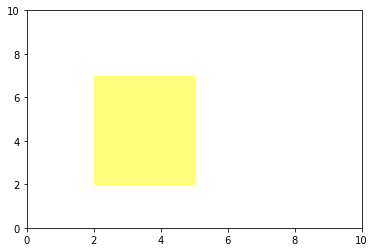

In [224]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


areaLimit=10
fig=plt.figure()
plt.xlim([0*areaLimit,areaLimit])
plt.ylim([0*areaLimit,areaLimit])
ax=fig.add_subplot(111)
rawData=newTower()
user=matplotlib.patches.Rectangle((rawData[0],rawData[1]),rawData[2],rawData[3],color='yellow',alpha=0.5)
ax.add_patch(user)

then the second tower:

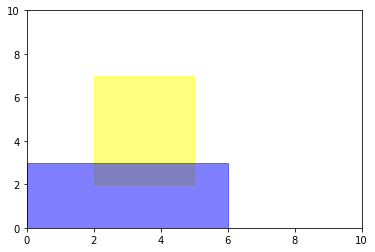

In [225]:
rawData=newTower()
user=matplotlib.patches.Rectangle((rawData[0],rawData[1]),rawData[2],rawData[3],color='blue',alpha=0.5)
ax.add_patch(user)
fig


Here we can see there are the overlap in these two signal tower, to avoid the overlap, I will use matrix to do the analysis. first, we set the whole area to be 10x10 list and was initiated as 10x10 zeros:

In [226]:
filled_points=np.zeros([areaLimit,areaLimit],dtype=int)
print filled_points

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


as we notice that the first(yellow) rectangle is 7x7 , we will set it to be zero to note that these areas have been covered. rawData of the 1st rectangle should be [0,2,7,7], Then the filled_points should be as follows:

In [227]:
rawData=[2,2,3,5]
counts=np.zeros((rawData[3],rawData[2]),dtype=int)
for i in range(len(filled_points)):
    for j in range(len(filled_points[i])):
        assert filled_points[i][j] in [0,1]
    #filled tower signal should be list of [0,1]
for i in range(rawData[3]):
    for j in range(rawData[2]):
        filled_points[len(filled_points)-rawData[1]-rawData[3]+i][rawData[0]+j]=1
print filled_points

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


New we are going to analysis the 2nd tower, which rawData[2,8,6,2]. However, we are going to just count the non-overlap part. If there is already signal covered, we are going to set the value to 0, and only there is no signal covered, we can set the value to 1. so that we will get:

In [228]:
rawData=[0,0,6,3]
counts=np.zeros((rawData[3],rawData[2]),dtype=int)
for i in range(rawData[3]):
    for j in range(rawData[2]):
        if filled_points[len(filled_points)-rawData[1]-rawData[3]+i][rawData[0]+j]==0:
            counts[i][j]=1
        else:
            counts[i][j]=0
        filled_points[len(filled_points)-rawData[1]-rawData[3]+i][rawData[0]+j]=1
print 'filled_points \n',filled_points
print "counts\n",counts

filled_points 
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0]]
counts
[[1 1 0 0 0 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]


in filled_points "1" means signal cover (before-trimmed), and '0' means no signal cover. Then we get the array counts to trim as above. In array counts, 1 means no overlap, 0 means overlapped. Then, we are going to use function accumulate to accumulate the counts one row by one row, the total procedure was included in function accumulate:

In [229]:
def accumulate(filled_points,rawData):
    counts=np.zeros((rawData[3],rawData[2]),dtype=int)
    for i in range(len(filled_points)):
        for j in range(len(filled_points[i])):
            assert filled_points[i][j] in [0,1]
    #filled tower signal should be list of [0,1]
    for i in range(rawData[3]):
        for j in range(rawData[2]):
            if filled_points[len(filled_points)-rawData[1]-rawData[3]+i][rawData[0]+j]==0:
                counts[i][j]=1
            else:
                counts[i][j]=0
            filled_points[len(filled_points)-rawData[1]-rawData[3]+i][rawData[0]+j]=1
    accum=np.zeros((rawData[3],rawData[2]),dtype=int)
    max_area=0
    for i in range(0,len(counts)):
        if i==0:
            accum[i]=counts[i]
        
        else:
            for j in range(len(counts[i])):
                if counts[i][j]==0:
                    accum[i][j]=0
                else:
                    accum[i][j]=accumulate[i-1][j]+1
    return accum,filled

I will use the exaple above to show how the accumlate works:

In [230]:
accum=np.zeros((rawData[3],rawData[2]),dtype=int)
max_area=0
for i in range(0,len(counts)):
    if i==0:
        accum[i]=counts[i]
        
    else:
        for j in range(len(counts[i])):
            if counts[i][j]==0:
                accum[i][j]=0
            else:
                accum[i][j]=accum[i-1][j]+1
print accum

[[1 1 0 0 0 1]
 [2 2 1 1 1 2]
 [3 3 2 2 2 3]]


Then I will use row_max(a) and trim_rec(accumulate)function to trim the rectangle and get the rawData of trimmed rectangle:

In [231]:
def row_max(a):
    xx=0
    h=0
    max_area=0
    for i in range(len(a)):
        area=0
        if a[i]==0:
            continue
        elif a[i]==1:
            for j in range(i,len(a)):
                if a[j]>0:
                    area=area+1
                    x=i
                else:
                    break
            if area>max_area:
                max_area=area
                xx=x+1
                h=1
            
        elif a[i]>1:
            for k in range(1,a[i]+1):
                area=0
                for j in range(i,len(a)):
                    if a[j]>=k:
                        area=area+k
                    else: break
            if area>max_area:
                max_area=area
                xx=i+1
                h=k
    return max_area,xx,h


def trim_rec(accumulate):
    max_area=0
    x=0
    wide=0
    height=0
    y=0
    for i in range(len(accumulate)):
        area=row_max(accumulate[i])[0]
        if area>max_area:
            max_area,x,height=row_max(accumulate[i])
            y=i+1
            wide=max_area/height
        else:
            continue
    return max_area,x+rawData[0]-1,rawData[1]+rawData[3]-y,wide,height

From the array accum, we can we directly see from array accum, the 1st row will form a rectangle with area of 5, while from the 2nd row, we can also trim a rectangle with area of 2, in that case, after compare the area, we know trim the area to the first row should be a good choice. We can also derive the rawData of trimmed rectangle: 

In [232]:
max_area=0
for i in range(len(accum)):
    area,x,height=row_max(accum[i])
    print area,x,height
    if area>max_area:
        max_area=area
        max_area,x,height=row_max(accum[i])
        y=i
        wide=max_area/height
    else:
        continue
max_area,x,y,wide,height=trim_rec(accum)
new_rawData= [x,y,wide,height]
print new_rawData
print max_area,x,y,wide,height

2 1 1
4 1 2
8 3 2
[2, 0, 4, 2]
8 2 0 4 2


Now we have already now the new x, y, wide, and height. we set it to new_rawData. and we can get the figure

[2, 0, 4, 2]


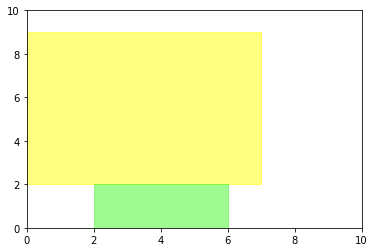

In [234]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
areaLimit=10
fig=plt.figure()
plt.xlim([0*areaLimit,areaLimit])
plt.ylim([0*areaLimit,areaLimit])
ax=fig.add_subplot(111)
rawData=newTower()
user=matplotlib.patches.Rectangle((0,2),7,7,color='yellow',alpha=0.5)
ax.add_patch(user)
area=7*7
r = lambda: random.randint(0,255)
c=('#%02X%02X%02X' % (r(),r(),r()))
print new_rawData
user=matplotlib.patches.Rectangle((new_rawData[0],new_rawData[1]),new_rawData[2],new_rawData[3],color=c,alpha=0.5)
ax.add_patch(user)
fig.show()

The trimmed fig shows above, the area will be accumulated as total_area=total_area+max_area
Then we can get a result by running multiple times. 

Then the functions can be arrange in a main function, I will run 5 times as am exmple:

please input the edge of the whole area10
[0, 0, 9, 6]
54
[4, 7, 3, 1]
57
[8, 0, 1, 9]
60
[1, 7, 3, 2]
66
[0, 7, 3, 2]
68


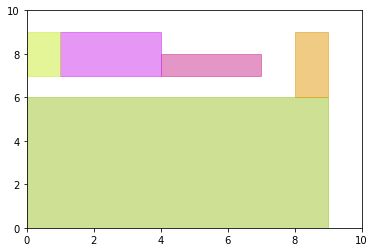

In [235]:
import numpy as np
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
areaLimit=int(input("please input the edge of the whole area"))
fig=plt.figure()
plt.xlim([0*areaLimit,areaLimit])
plt.ylim([0*areaLimit,areaLimit])
ax=fig.add_subplot(111)
filled=np.zeros([areaLimit,areaLimit],dtype=int)
total_area=range(100)
n=range(100)
for n in range(5):
    max_area,x,y,wide,height=[0,0,0,0,0]
    rawData=newTower()
    if n==0:
        counts=np.zeros((rawData[3],rawData[2]),dtype=int)
        print rawData
        for i in range(len(filled)):
            for j in range(len(filled)):
                assert filled[i][j] in [0,1]
# #     #filled tower signal should be list of [0,1]
        for i in range(rawData[3]):
            for j in range(rawData[2]):
                filled[len(filled)-rawData[1]-rawData[3]+i][rawData[0]+j]=1
        r = lambda: random.randint(0,255)
        c=('#%02X%02X%02X' % (r(),r(),r()))
        user=matplotlib.patches.Rectangle((rawData[0],rawData[1]),rawData[2],rawData[3],color=c,alpha=0.5)
        ax.add_patch(user)
        total_area[n]=rawData[2]*rawData[3]
        print total_area[n]
        
    else:
        print rawData
        counts=np.zeros((rawData[3],rawData[2]),dtype=int)
        for i in range(rawData[3]):
            for j in range(rawData[2]):
                if filled[len(filled)-rawData[1]-rawData[3]+i][rawData[0]+j]==0:
                    counts[i][j]=1
                else:
                    counts[i][j]=0
                filled[len(filled_points)-rawData[1]-rawData[3]+i][rawData[0]+j]=1
        accum=np.zeros((rawData[3],rawData[2]),dtype=int)
        max_area=0
        for i in range(0,len(counts)):
            if i==0:
                accum[i]=counts[i]
        
            else:
                for j in range(len(counts[i])):
                    if counts[i][j]==0:
                        accum[i][j]=0
                    else:
                        accum[i][j]=accum[i-1][j]+1
        max_area=0
        for i in range(len(accum)):
            area,x,height=row_max(accum[i])
            if area>max_area:
                max_area=area
                max_area,x,height=row_max(accum[i])
                y=i
                wide=max_area/height
            else:
                continue
        max_area,x,y,wide,height=trim_rec(accum)
        new_rawData= [x,y,wide,height]
        total_area[n]=total_area[n-1]+max_area
        print total_area[n]
        r = lambda: random.randint(0,255)
        c=('#%02X%02X%02X' % (r(),r(),r()))
        user=matplotlib.patches.Rectangle((new_rawData[0],new_rawData[1]),new_rawData[2],new_rawData[3],color=c,alpha=0.5)
        ax.add_patch(user)
   
    fig

Fig. 5 tower generated

Here noticable, there is no overlap and from the each rawData generated, we can easily check that the function runs well. 


Then we are going to do the data analysis process:
    1. Given an overall desired coverage footprint and a sequence of  n communications towers, what is the resulting resolved coverage?
    2. What is the total area of coverage relative to the desired total coverage area of the original footprint? That is, are there any gaps in coverage?
    3. On average, how many communications towers are required before full coverage is obtained?

please input the edge of the whole area10


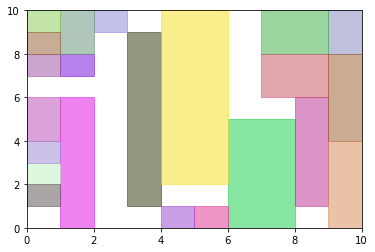

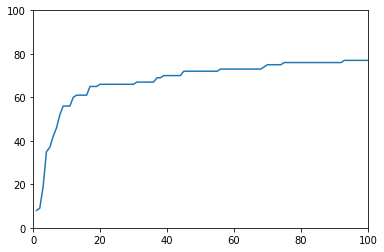

In [241]:
import numpy as np
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
areaLimit=int(input("please input the edge of the whole area"))
fig=plt.figure()
plt.xlim([0*areaLimit,areaLimit])
plt.ylim([0*areaLimit,areaLimit])
ax=fig.add_subplot(111)
filled=np.zeros([areaLimit,areaLimit],dtype=int)
total_area=[0]*100
time=range(1,101)
sum_area=0
for n in range(100):
    max_area,x,y,wide,height=[0,0,0,0,0]
    rawData=newTower()
    if n==0:
        counts=np.zeros((rawData[3],rawData[2]),dtype=int)
        for i in range(len(filled)):
            for j in range(len(filled)):
                assert filled[i][j] in [0,1]
# #     #filled tower signal should be list of [0,1]
        for i in range(rawData[3]):
            for j in range(rawData[2]):
                filled[len(filled)-rawData[1]-rawData[3]+i][rawData[0]+j]=1
        r = lambda: random.randint(0,255)
        c=('#%02X%02X%02X' % (r(),r(),r()))
        user=matplotlib.patches.Rectangle((rawData[0],rawData[1]),rawData[2],rawData[3],color=c,alpha=0.5)
        ax.add_patch(user)
        total_area[n]=rawData[2]*rawData[3]
    else:
        counts=np.zeros((rawData[3],rawData[2]),dtype=int)
        for i in range(rawData[3]):
            for j in range(rawData[2]):
                if filled[len(filled)-rawData[1]-rawData[3]+i][rawData[0]+j]==0:
                    counts[i][j]=1
                else:
                    counts[i][j]=0
                filled[len(filled_points)-rawData[1]-rawData[3]+i][rawData[0]+j]=1
        accum=np.zeros((rawData[3],rawData[2]),dtype=int)
        max_area=0
        for i in range(0,len(counts)):
            if i==0:
                accum[i]=counts[i]
        
            else:
                for j in range(len(counts[i])):
                    if counts[i][j]==0:
                        accum[i][j]=0
                    else:
                        accum[i][j]=accum[i-1][j]+1
        max_area=0
        for i in range(len(accum)):
            area,x,height=row_max(accum[i])
            if area>max_area:
                max_area=area
                max_area,x,height=row_max(accum[i])
                y=i
                wide=max_area/height
            else:
                continue
        max_area,x,y,wide,height=trim_rec(accum)
        new_rawData= [x,y,wide,height]
        total_area[n]=total_area[n-1]+max_area
        r = lambda: random.randint(0,255)
        c=('#%02X%02X%02X' % (r(),r(),r()))
        user=matplotlib.patches.Rectangle((new_rawData[0],new_rawData[1]),new_rawData[2],new_rawData[3],color=c,alpha=0.5)
        ax.add_patch(user)
    sum_area=total_area[n]
fig1 = plt.figure

   
fig1=plt.figure()
plt.xlim([0,100])
plt.ylim([0,areaLimit*areaLimit])
ax=fig1.add_subplot(111)
ax.plot(time,total_area)


We can see there still some gap in coverge, that may because of the random process is random generate an (x,y), and then randome generate a wide and height between (x,y)and the axis. 
That is, if I choose a point(1,1), I can only generate a rectangle between (1,1) and (100,100). I may optimize the generation process as randomly generate 2 points, that will be much more better.
I define another generation function to random choose 2 points as the bottom left and top right corner of the signal area:


In [280]:
def newTower():#generate a new tower with random uniformly distribution
    import numpy as np
    import random
    x1=random.randint(0,areaLimit)
    y1=random.randint(0,areaLimit)
    x2=random.randint(0,areaLimit)
    while x2==x1:
        x2=random.randint(0,areaLimit)
    y2=random.randint(0,areaLimit)
    while y2==y1:
        y2=random.randint(0,areaLimit)
    wide = abs(x1-x2)
    height=abs(y1-y2)
    x=min(x1,x2)
    y=min(y1,y2)
    height=random.randint(1,areaLimit-y)
        #random set the area
    rawData=[x,y,wide,height]
    #user=matplotlib.patches.Rectangle((x,y),wide,height,color='yellow')
    return rawData

then run the function again:
    

please input the edge of the whole area10


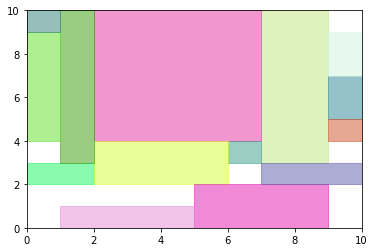

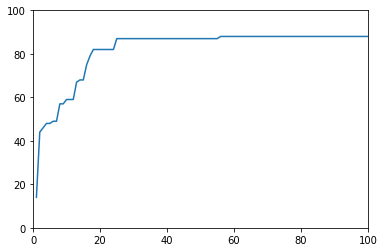

In [255]:
import numpy as np
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
areaLimit=int(input("please input the edge of the whole area"))
fig=plt.figure()
plt.xlim([0*areaLimit,areaLimit])
plt.ylim([0*areaLimit,areaLimit])
ax=fig.add_subplot(111)
filled=np.zeros([areaLimit,areaLimit],dtype=int)
total_area=[0]*100
time=range(1,101)
sum_area=0
for n in range(100):
    max_area,x,y,wide,height=[0,0,0,0,0]
    rawData=newTower()
    if n==0:
        counts=np.zeros((rawData[3],rawData[2]),dtype=int)
        for i in range(len(filled)):
            for j in range(len(filled)):
                assert filled[i][j] in [0,1]
# #     #filled tower signal should be list of [0,1]
        for i in range(rawData[3]):
            for j in range(rawData[2]):
                filled[len(filled)-rawData[1]-rawData[3]+i][rawData[0]+j]=1
        r = lambda: random.randint(0,255)
        c=('#%02X%02X%02X' % (r(),r(),r()))
        user=matplotlib.patches.Rectangle((rawData[0],rawData[1]),rawData[2],rawData[3],color=c,alpha=0.5)
        ax.add_patch(user)
        total_area[n]=rawData[2]*rawData[3]
    else:
        counts=np.zeros((rawData[3],rawData[2]),dtype=int)
        for i in range(rawData[3]):
            for j in range(rawData[2]):
                if filled[len(filled)-rawData[1]-rawData[3]+i][rawData[0]+j]==0:
                    counts[i][j]=1
                else:
                    counts[i][j]=0
                filled[len(filled_points)-rawData[1]-rawData[3]+i][rawData[0]+j]=1
        accum=np.zeros((rawData[3],rawData[2]),dtype=int)
        max_area=0
        for i in range(0,len(counts)):
            if i==0:
                accum[i]=counts[i]
        
            else:
                for j in range(len(counts[i])):
                    if counts[i][j]==0:
                        accum[i][j]=0
                    else:
                        accum[i][j]=accum[i-1][j]+1
        max_area=0
        for i in range(len(accum)):
            area,x,height=row_max(accum[i])
            if area>max_area:
                max_area=area
                max_area,x,height=row_max(accum[i])
                y=i
                wide=max_area/height
            else:
                continue
        max_area,x,y,wide,height=trim_rec(accum)
        new_rawData= [x,y,wide,height]
        total_area[n]=total_area[n-1]+max_area
        r = lambda: random.randint(0,255)
        c=('#%02X%02X%02X' % (r(),r(),r()))
        user=matplotlib.patches.Rectangle((new_rawData[0],new_rawData[1]),new_rawData[2],new_rawData[3],color=c,alpha=0.5)
        ax.add_patch(user)
    sum_area=total_area[n]
fig1 = plt.figure

   
fig1=plt.figure()
plt.xlim([0,100])
plt.ylim([0,areaLimit*areaLimit])
ax=fig1.add_subplot(111)
ax.plot(time,total_area)



the coverage is much better, however, there still some places cannot be covered. From the way we generate the tower, we can find that the point (0,0)coverage posibility is still much small than other points, that is only when we chose (0,0)as a start point, it can be convered. And also if there is a point haven't been covered, the next tower is still randomly generated, there is still possibility to both cover and not cover. 

# Limitation
The larger the x,y is, the larger the possibility it will be to be covered by thtis system. If we want a good coverage on the whole area, it is better to think about the area that haven't been covered. However, in this problem, the user of the system is not reliable and randomly generate the tower makes this system have a limitation on optimizing the full-coverage. 

In [ ]:
import numpy as np
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
areaLimit=int(input("please input the edge of the whole area"))
fig=plt.figure()
plt.xlim([0*areaLimit,areaLimit])
plt.ylim([0*areaLimit,areaLimit])
ax=fig.add_subplot(111)
filled=np.zeros([areaLimit,areaLimit],dtype=int)
time=[0]
n=0
total=[0]
while total[n]<areaLimit*areaLimit:
    max_area,x,y,wide,height=[0,0,0,0,0]
    rawData=newTower()
    
    time.append(n+1)
    if n==0:
        counts=np.zeros((rawData[3],rawData[2]),dtype=int)
        for i in range(len(filled)):
            for j in range(len(filled)):
                assert filled[i][j] in [0,1]
# #     #filled tower signal should be list of [0,1]
        for i in range(rawData[3]):
            for j in range(rawData[2]):
                filled[len(filled)-rawData[1]-rawData[3]+i][rawData[0]+j]=1
        r = lambda: random.randint(0,255)
        c=('#%02X%02X%02X' % (r(),r(),r()))
        user=matplotlib.patches.Rectangle((rawData[0],rawData[1]),rawData[2],rawData[3],color=c,alpha=0.5)
        ax.add_patch(user)
    
    else:
        counts=np.zeros((rawData[3],rawData[2]),dtype=int)
        for i in range(rawData[3]):
            for j in range(rawData[2]):
                if filled[len(filled)-rawData[1]-rawData[3]+i][rawData[0]+j]==0:
                    counts[i][j]=1
                else:
                    counts[i][j]=0
                filled[len(filled_points)-rawData[1]-rawData[3]+i][rawData[0]+j]=1
        accum=np.zeros((rawData[3],rawData[2]),dtype=int)
        max_area=0
        for i in range(0,len(counts)):
            if i==0:
                accum[i]=counts[i]
        
            else:
                for j in range(len(counts[i])):
                    if counts[i][j]==0:
                        accum[i][j]=0
                    else:
                        accum[i][j]=accum[i-1][j]+1
        max_area=0
        for i in range(len(accum)):
            area,x,height=row_max(accum[i])
            if area>max_area:
                max_area=area
                max_area,x,height=row_max(accum[i])
                y=i
                wide=max_area/height
            else:
                continue
        max_area,x,y,wide,height=trim_rec(accum)
        new_rawData= [x,y,wide,height]
        r = lambda: random.randint(0,255)
        c=('#%02X%02X%02X' % (r(),r(),r()))
        user=matplotlib.patches.Rectangle((new_rawData[0],new_rawData[1]),new_rawData[2],new_rawData[3],color=c,alpha=0.5)
        ax.add_patch(user)
        #total_area.append(total_area[n-1]+max_area)
        print total_area
        time.append(n+1)
        print time
    if n==0:
        total.append(rawData[2]*rawData[3])
    else:
        total.append(new_rawData[2]*new_rawData[3])
    n=n+1
    print n
fig1 = plt.figure

Thus when I run the function above want to see how many time it need to full fill the area, it cannot run out the result.